In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math
from plotnine import ggplot, aes, geom_line


Isotropic Gaussian spectral model


In [2]:
def g_iso(z1,z2):
    return 1 - np.exp(-10 * (z1**2 + z2**2))



In [3]:
z1_list = np.linspace(-1.0, 1.0, 100)
z2_list = np.linspace(-1.0, 1.0, 100)
Z1, Z2 = np.meshgrid(z1_list, z2_list)
G_iso = g_iso(Z1,Z2)

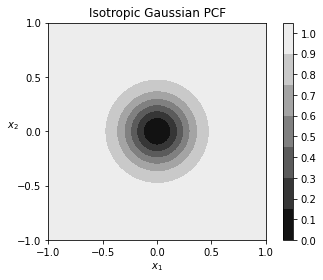

In [5]:
fig,ax=plt.subplots(1,1)
v=np.linspace(0,1,11,endpoint=True)
cp = ax.contourf(Z1, Z2, G_iso, cmap='gist_gray')
fig.colorbar(cp,ticks=v) # Add a colorbar to a plot
ax.set_title('Isotropic Gaussian PCF')
ax.set_xlabel('$x_1$')
h=ax.set_ylabel('$x_2$')
h.set_rotation(0)
plt.xticks(np.arange(-1, 1.25, step=0.5))
plt.yticks(np.arange(-1, 1.25, step=0.5))

plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('iso_pcf.pdf',bbox_inches="tight")

Anisotropic Gaussian-like
*testo in corsivo*

In [4]:
def g_aniso_bisec(z1,z2):
    S = np.array([[np.sqrt(2)/2, -np.sqrt(2)/2],
                  [np.sqrt(2)/2, np.sqrt(2)/2]])
    D = np.diag([1,4])
    Lam = np.matmul(np.matmul(S,D),LA.inv(S))
    return 1 - np.exp(-5 / (D[1,1]*D[0,0]) * ((Lam[0,0]*z1 + Lam[0,1]*z2)**2 + (Lam[1,0]*z1+ Lam[1,1]*z2)**2))

In [5]:
z1_list = np.linspace(-1.0, 1.0, 100)
z2_list = np.linspace(-1.0, 1.0, 100)
Z1, Z2 = np.meshgrid(z1_list, z2_list)
G_aniso_bisec = g_aniso_bisec(Z1,Z2)

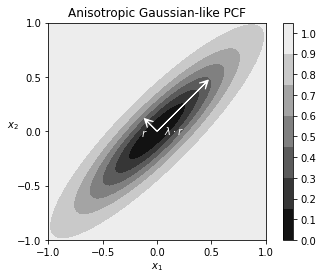

In [8]:
fig,ax=plt.subplots(1,1)
v=np.linspace(0,1,11,endpoint=True)
cp = ax.contourf(Z1, Z2, G_aniso_bisec,cmap='gist_gray')
plt.colorbar(cp,ticks=v)
#fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Anisotropic Gaussian-like PCF')
ax.set_xlabel('$x_1$')
h=ax.set_ylabel('$x_2$')
h.set_rotation(0)
plt.xticks(np.arange(-1, 1.25, step=0.5))
plt.yticks(np.arange(-1, 1.25, step=0.5))
plt.arrow(0,0,math.sqrt(2)/3,math.sqrt(2)/3,color='white', lw = 1, 
             head_width=0.08, head_length=0.08, overhang = 0.7, 
             length_includes_head= True)
plt.arrow(0,0,-math.sqrt(2)/12,math.sqrt(2)/12,color='white', lw = 1, 
             head_width=0.08, head_length=0.08, overhang = 0.7, 
             length_includes_head= True)
plt.text(0.06,-0.03, r'$\lambda \cdot r$', color='white')
plt.text(-0.15,-0.05, r'$r$', color='white')
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('aniso_bisec_eigen_pcf_poster.pdf',bbox_inches="tight")

Only contour lines

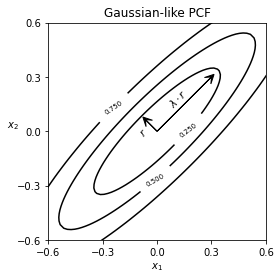

In [7]:
lwind = 0.6

fig, ax = plt.subplots(1,1)
CS = ax.contour(Z1, Z2, G_aniso_bisec, 3, colors='k')
ax.clabel(CS, inline=True, fontsize=7)
ax.set_title('Gaussian-like PCF')
ax.set_xlabel('$x_1$')
h=ax.set_ylabel('$x_2$')
h.set_rotation(0)
plt.xlim([-lwind,lwind])
plt.ylim([-lwind,lwind])

plt.xticks(np.arange(-lwind, lwind+lwind/2, step=lwind/2))
plt.yticks(np.arange(-lwind, lwind+lwind/2, step=lwind/2))
#plt.xticks(np.arange(-1, 1.25, step=0.5))
#plt.yticks(np.arange(-1, 1.25, step=0.5))

plt.arrow(0,0,math.sqrt(2)*2/9,math.sqrt(2)*2/9,color='k', lw = 1, 
             head_width=0.05, head_length=0.05, overhang = 0.6, 
             length_includes_head= True)
plt.arrow(0,0,-math.sqrt(2)/18, math.sqrt(2)/18,color='k', lw = 1, 
             head_width=0.05, head_length=0.05, overhang = 0.6, 
             length_includes_head= True)
plt.text(0.05,0.13, r'$\lambda \cdot r$', color='k', rotation=45)
plt.text(-0.11,-0.03, r'$r$', color='k', rotation= 45)
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('gauss_like_pcf.pdf',bbox_inches="tight")

parallel anisotropy


In [8]:
def g_aniso_paral(z1,z2):
    Lam = np.diag([1,4])
    return 1 - np.exp(-5 / (Lam[1,1]*Lam[0,0]) * ((Lam[0,0]*z1)**2 + (Lam[1,1]*z2)**2))


In [9]:
z1_list = np.linspace(-1.0, 1.0, 100)
z2_list = np.linspace(-1.0, 1.0, 100)
Z1, Z2 = np.meshgrid(z1_list, z2_list)
G_aniso_paral = g_aniso_paral(Z1,Z2)

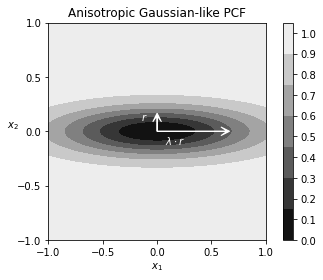

In [11]:
fig,ax=plt.subplots(1,1)
v=np.linspace(0,1,11,endpoint=True)
cp = ax.contourf(Z1, Z2, G_aniso_paral,cmap='gist_gray')
plt.colorbar(cp,ticks=v)
#fig.colorbar(cp) # Add a colorbar to a plot
ax.set_title('Anisotropic Gaussian-like PCF')
ax.set_xlabel('$x_1$')
h=ax.set_ylabel('$x_2$')
h.set_rotation(0)
plt.xticks(np.arange(-1, 1.25, step=0.5))
plt.yticks(np.arange(-1, 1.25, step=0.5))
plt.arrow(0,0,2/3,0,color='white', lw = 1, 
             head_width=0.08, head_length=0.08, overhang = 0.7, 
             length_includes_head= True)
plt.arrow(0,0,0,1/6,color='white', lw = 1, 
             head_width=0.08, head_length=0.08, overhang = 0.7, 
             length_includes_head= True)
plt.text(0.07,-0.12, r'$\lambda \cdot r$', color='white')
plt.text(-0.15,0.1, r'$r$', color='white')

plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('aniso_paral_eigen_pcf.pdf',bbox_inches="tight")

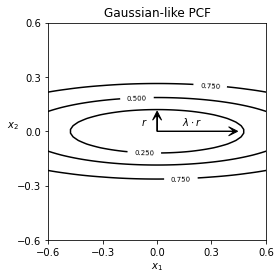

In [18]:
lwind = 0.6

fig, ax = plt.subplots(1,1)
CS = ax.contour(Z1, Z2, G_aniso_paral, 3, colors='k')
ax.clabel(CS, inline=True, fontsize=7)
ax.set_title('Gaussian-like PCF')
ax.set_xlabel('$x_1$')
h=ax.set_ylabel('$x_2$')
h.set_rotation(0)
plt.xlim([-lwind,lwind])
plt.ylim([-lwind,lwind])

plt.xticks(np.arange(-lwind, lwind+lwind/2, step=lwind/2))
plt.yticks(np.arange(-lwind, lwind+lwind/2, step=lwind/2))
#plt.xticks(np.arange(-1, 1.25, step=0.5))
#plt.yticks(np.arange(-1, 1.25, step=0.5))

plt.arrow(0,0,4/9,0,color='k', lw = 1, 
             head_width=0.05, head_length=0.05, overhang = 0.6, 
             length_includes_head= True)
plt.arrow(0,0,0, 1/9,color='k', lw = 1, 
             head_width=0.05, head_length=0.05, overhang = 0.6, 
             length_includes_head= True)
plt.text(0.14,0.03, r'$\lambda \cdot r$', color='k')
plt.text(-0.09,0.03, r'$r$', color='k')
plt.gca().set_aspect('equal', adjustable='box')
fig.savefig('gauss_like_pcf_paral.pdf',bbox_inches="tight")